# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**SHREYA THAKKAR**

-   I worked alone on this assignment with help from references from internet.




# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**



In [1]:
R=83.14 #cm3 bar/ molK
T=200+273.16 #K
P=10 #bar
V=R*T/P #calculating molar volume using ideal gas law
Volume=round(V,1)
print ("Molar volume of isopropanol is",Volume,"cm^3/mol")

Molar volume of isopropanol is 3933.9 cm^3/mol


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



In [19]:
#Defining function file to calculate f(V)
def virial(V):
    B=-388 #cm3/mol
    C=-26000 #cm6/mol2
    virialvol=P*V/R/T-1-B/V-C/V/V
    return virialvol

#Testing that function works by inputing an array of volumes calculating corresponding f(V)
import numpy as np
Vol=np.linspace(0.01,Volume,10)
print(Vol,virial(Vol))


[1.00000000e-02 4.37108889e+02 8.74207778e+02 1.31130667e+03
 1.74840556e+03 2.18550444e+03 2.62260333e+03 3.05970222e+03
 3.49680111e+03 3.93390000e+03] [ 2.60038799e+08  1.34845322e-01 -2.99921928e-01 -3.55652401e-01
 -3.25126984e-01 -2.61459789e-01 -1.81599650e-01 -9.26252383e-02
  1.98485260e-03  1.00322067e-01]


### Plot f(V) over a range where you can observe a zero



You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



Text(0.5, 1.0, 'f(V) versus Volume')

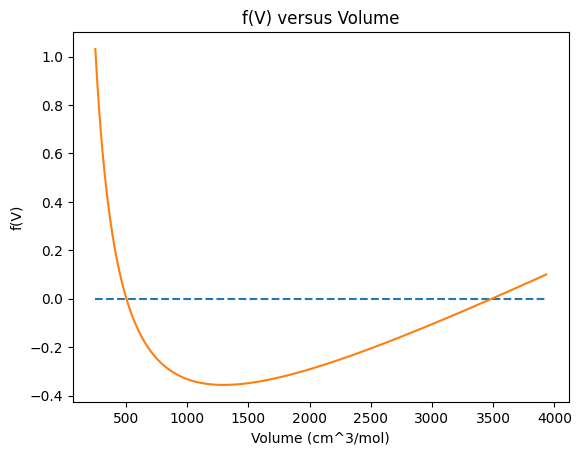

In [24]:
import matplotlib.pyplot as plt

plotVol=np.linspace(250,Volume,1000) #Defining an array of volumes over a large range to get a first estimate of solution
plt.plot(plotVol, plotVol*0, linestyle = "dashed") #plotting a line at y=0 to make solutions evident
plt.plot(plotVol,virial(plotVol))
plt.xlabel("Volume (cm^3/mol)")
plt.ylabel("f(V)")
plt.title("f(V) versus Volume")

Text(0.5, 1.0, 'f(V) versus Volume')

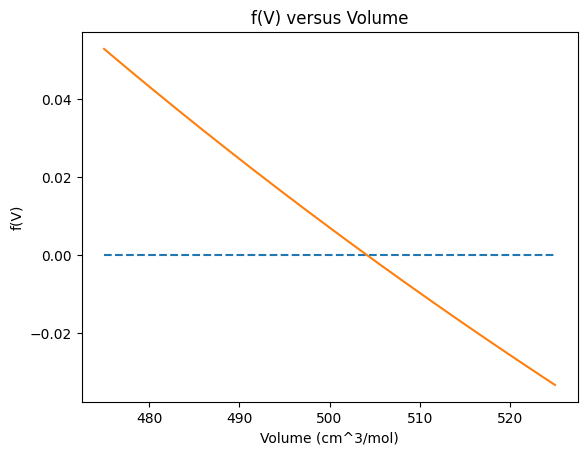

In [25]:
#Zoomed-in X-axis; first solution
plotVol1=np.linspace(475,525,1000)
plt.plot(plotVol1, plotVol1*0, linestyle = "dashed")
plt.plot(plotVol1,virial(plotVol1))
plt.xlabel("Volume (cm^3/mol)")
plt.ylabel("f(V)")
plt.title("f(V) versus Volume")

Text(0.5, 1.0, 'f(V) versus Volume')

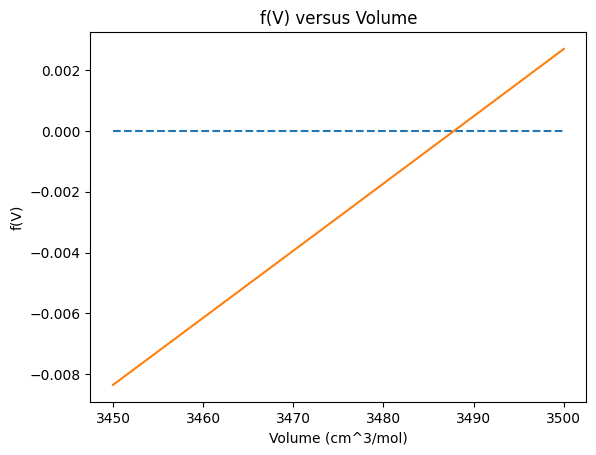

In [26]:
#Zoomed-in X-axis, second solution
plotVol2=np.linspace(3450,3500,100)
plt.plot(plotVol2, plotVol2*0, linestyle = "dashed")
plt.plot(plotVol2,virial(plotVol2))
plt.xlabel("Volume (cm^3/mol)")
plt.ylabel("f(V)")
plt.title("f(V) versus Volume")

State in words where the solution(s) are:

One of the solutions is between 500 $cm^3/mol$ to 510 $cm^3/mol$ and the other solution is in between 3480 $cm^3/mol$ and 3490 $cm^3/mol$


### Express this in the form of a cubic polynomial in $V$



Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.



$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

Converting in the form of, $0 = a V^3 + b V^2 + c V + d$ by multiplying throughout by $V^2$

$f(V) = \frac{PV^3}{RT} - V^2 - {BV} - {C} = 0$

where

$a=\frac{P}{RT}$

$b=-1$

$c=-B$

$d=-C$

# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heat from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [27]:
import scipy 
import scipy.integrate
from scipy.integrate import odeint

In [29]:

#defining function file for lorenz equations
    
def lorenz(variables, t, sigma, rho, beta):
    [x,y,z] = variables
    dxdt = sigma*(y-x)  
    dydt = rho*x-y-x*z
    dzdt = -beta*z+x*y
    return [dxdt, dydt, dzdt]
   

t = np.linspace(0.0,1000.0,10000) #defining time to 1000 using 0.1 step size
x0 = 1.0
y0 = 1.0
z0 = 1.0  
sigma = 10.0
beta = 8.0/3.0
rho = 28.0
variables0 = [x0, y0, z0]  # the initial condition

solution = odeint(lorenz, variables0, t, args = (sigma, rho, beta))#calculating solution for lorenz equation

#saving solutions as a matrix
x = solution[:,0]
y = solution[:,1]
z = solution[:,2]

print(t,x,y,z)


[0.00000000e+00 1.00010001e-01 2.00020002e-01 ... 9.99799980e+02
 9.99899990e+02 1.00000000e+03] [ 1.          2.13334147  6.54396518 ...  5.57746834 10.7710809
 14.678946  ] [ 1.          4.47194904 13.73402857 ...  9.41156318 16.90320562
 14.05068634] [ 1.          1.11396462  4.18177121 ... 14.35325303 20.75045977
 35.96949624]


2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [30]:
x1 = 1.0
y1 = 1.0
z1 = 0.9999
variables1 = [x1, y1, z1]  # the initial condition updated

solution1 = odeint(lorenz, variables1, t, args = (sigma, rho, beta))#calculating solution at updated initial condition

x_a = solution1[:,0]
y_a = solution1[:,1]
z_a = solution1[:,2]

print(t, x_a, y_a, z_a)

[0.00000000e+00 1.00010001e-01 2.00020002e-01 ... 9.99799980e+02
 9.99899990e+02 1.00000000e+03] [ 1.          2.13334618  6.54399305 ... 12.29952004 13.50971233
  7.23251364] [ 1.          4.47196432 13.73409649 ... 17.32852084  9.7528091
  0.70841495] [ 0.9999      1.11388945  4.1817412  ... 25.51590835 37.17891853
 32.67559897]


3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

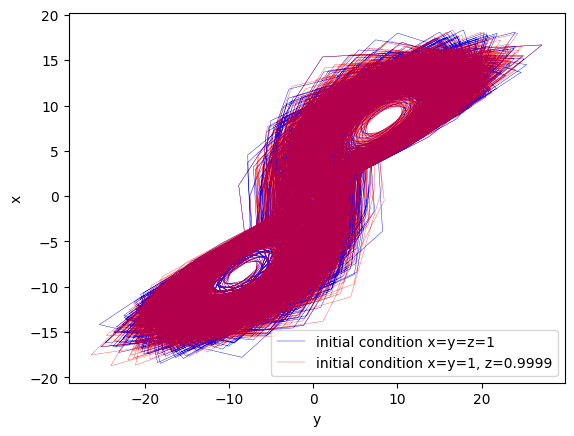

In [31]:
plt.plot(y,x, 'b', linewidth=0.3)
plt.plot(y_a,x_a, 'r', linewidth=0.3, alpha=0.7)
plt.xlabel("y")
plt.ylabel("x")
plt.legend(tuple(['initial condition x=y=z=1','initial condition x=y=1, z=0.9999']))

4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

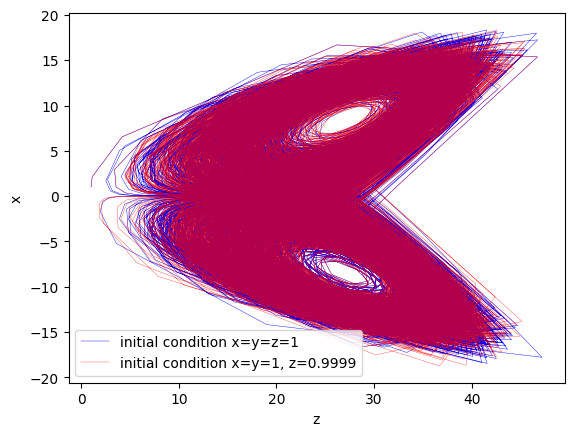

In [32]:
plt.plot(z,x, 'b', linewidth=0.3)
plt.plot(z_a,x_a, 'r', linewidth=0.3, alpha=0.7)
plt.xlabel("z")
plt.ylabel("x")
plt.legend(tuple(['initial condition x=y=z=1','initial condition x=y=1, z=0.9999']))

5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

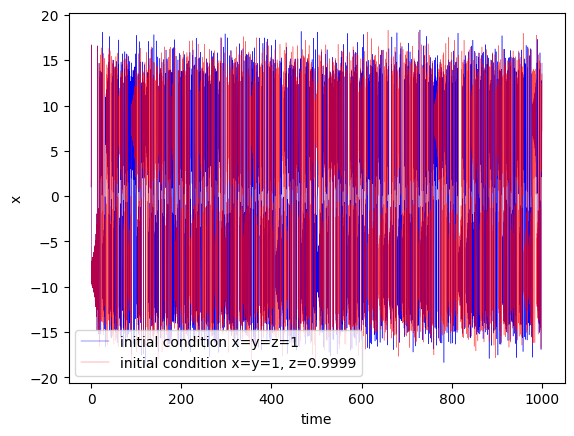

In [165]:
plt.plot(t,x, 'b', linewidth=0.3)
plt.plot(t,x_a, 'r', linewidth=0.3, alpha=0.7)
plt.xlabel("time")
plt.ylabel("x")
plt.legend(tuple(['initial condition x=y=z=1','initial condition x=y=1, z=0.9999']))

6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

**Changing the value of z by 0.01% did not significantly change the plots based on looking at the graphs. The plots for both initial conditions appear to be almost overalapping each other qualitatively.**

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [33]:
import pandas as pd
dat=pd.read_csv("florida.csv", skiprows=0) #using data frames to read csv file
dat

,week,cases_avg,deaths_avg
0,1,0.29,0.00
1,2,0.29,0.00
2,3,0.43,0.00
3,4,0.43,0.00
4,5,0.57,0.00
...,...,...,...
536,537,23792.86,201.29
537,538,21534.29,212.29
538,539,23313.86,212.29
539,540,23313.86,212.29


Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

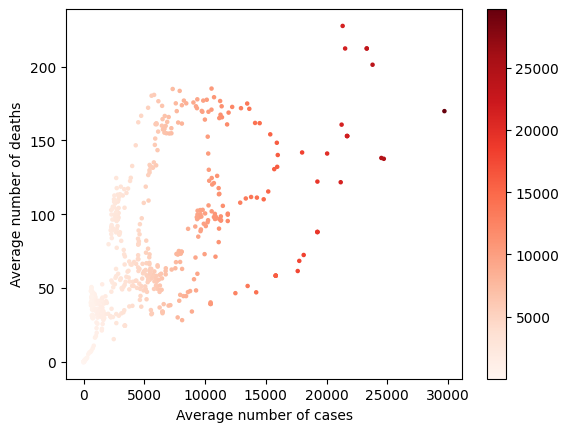

In [34]:
#scatter plot of average number of deaths versus average number of cases using matplotlib and colormaps attribute
cases = dat["cases_avg"]
deaths = dat["deaths_avg"]
plt.scatter(cases, deaths,  s=5, c=cases, cmap='Reds')
plt.xlabel("Average number of cases")
plt.ylabel("Average number of deaths")
plt.colorbar()

**Put Commentary here:**

The average number of deaths steeped in the initial weeks as the average number of cases increased and then gradually began to decline or stabilize, and then again increase during the more recent weeks.

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Right a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

In [35]:
m = [0.001,0.01,0.1, 1] #slope
#intercept=0

#using a for loop to compute death rate based on linear model using 4 different slopes
for slope in m:
    dat[f"death_calc {slope}"]=cases*slope
    
dat

,week,cases_avg,deaths_avg,death_calc 0.001,death_calc 0.01,death_calc 0.1,death_calc 1
0,1,0.29,0.00,0.00029,0.0029,0.029,0.29
1,2,0.29,0.00,0.00029,0.0029,0.029,0.29
2,3,0.43,0.00,0.00043,0.0043,0.043,0.43
3,4,0.43,0.00,0.00043,0.0043,0.043,0.43
4,5,0.57,0.00,0.00057,0.0057,0.057,0.57
...,...,...,...,...,...,...,...
536,537,23792.86,201.29,23.79286,237.9286,2379.286,23792.86
537,538,21534.29,212.29,21.53429,215.3429,2153.429,21534.29
538,539,23313.86,212.29,23.31386,233.1386,2331.386,23313.86
539,540,23313.86,212.29,23.31386,233.1386,2331.386,23313.86


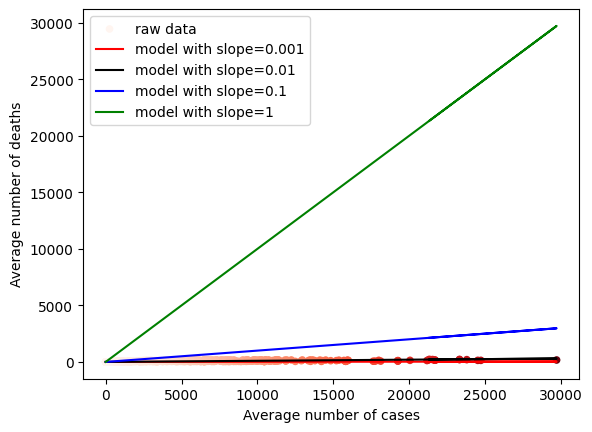

In [36]:
#Plotting the model with raw data to visually see which fits better
plt.scatter(cases, deaths,  s=20, c=cases, cmap='Reds')
plt.xlabel("Average number of cases")
plt.ylabel("Average number of deaths")
plt.plot(cases, dat["death_calc 0.001"],'r')
plt.plot(cases, dat["death_calc 0.01"],'k')
plt.plot(cases, dat["death_calc 0.1"],'b')
plt.plot(cases, dat["death_calc 1"],'g')
plt.legend(tuple(['raw data','model with slope=0.001','model with slope=0.01','model with slope=0.1','model with slope=1']))

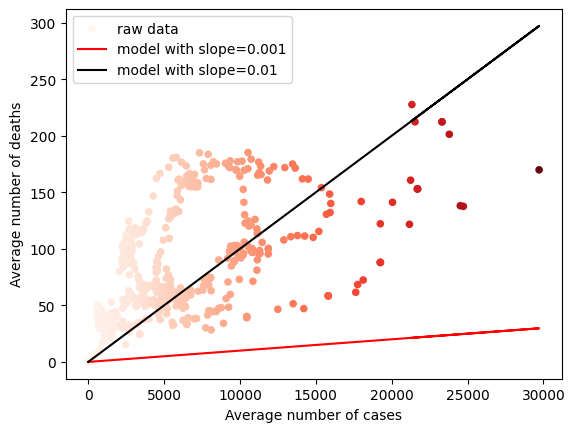

In [37]:
#To obtain a better visual picture
plt.scatter(cases, deaths,  s=20, c=cases, cmap='Reds')
plt.xlabel("Average number of cases")
plt.ylabel("Average number of deaths")
plt.plot(cases, dat["death_calc 0.001"],'r')
plt.plot(cases, dat["death_calc 0.01"],'k')
plt.legend(tuple(['raw data','model with slope=0.001','model with slope=0.01']))


Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

Visually, the black line, the one with slope 0.01 seems to be the best fit for the data. 

Best fit means that the the model most accurately represents the data which can be visually judged by looking at the plot and the model should have about equivalent number of data points on either side of the fitted line.

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here: https://github.com/sht150/Che_Math


**Upload your jupyter notebook to Canvas for grading. Thank you!